# <center>Aston University <br/><br/> CS3IVP: Digital Image and Video Processing <br/><br/> Lab 05: Image Filtering and Restoration</center>


Lecturers:<br/>
Debaleena Roy <a href="mailto:d.roy@aston.ac.uk">d.roy@aston.ac.uk</a> <br/>
Office: MB265K <br/>

Martin Rudorfer <a href="mailto:m.rudorfer@aston.ac.uk">m.rudorfer@aston.ac.uk</a> <br/>
Office: MB214G <br/>

## Goals
By the end of this session, you should know:
1. how to filter images using your own correlational filters,
2. how to implement various image restoration techniques discussed in lectures, and
3. how to determine the effectiveness of these techniques.



## Instructions
No submission is required for this laboratory.

## Introduction to Linear Filtering
First of all, **make sure to run the cell below**. It loads and shows the figure we will be using for this laboratory.

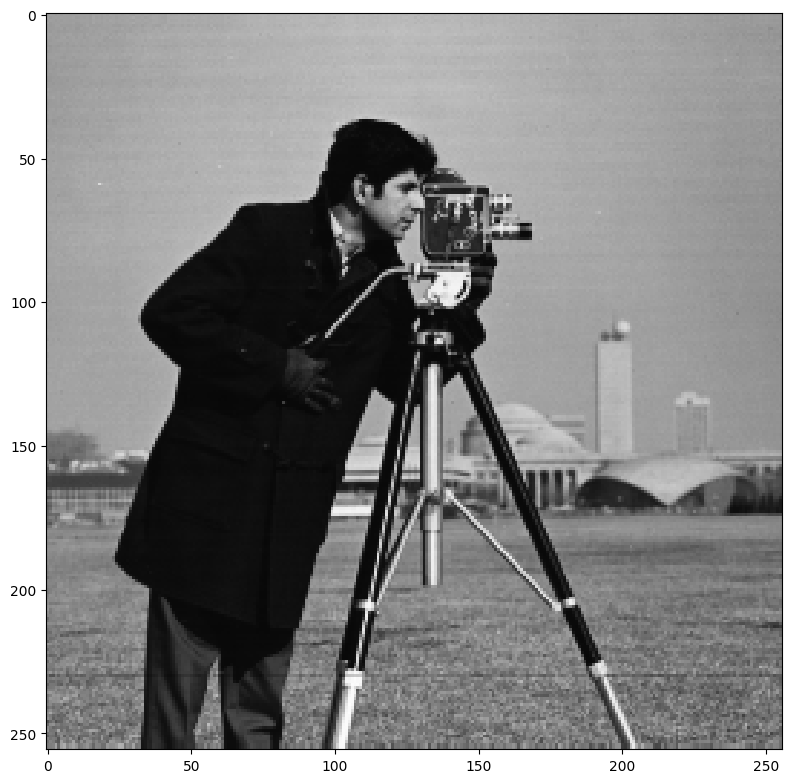

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from numpy import cos, pi
from skimage.io import imread, imsave, imshow
import scipy.ndimage

image = imread("camera.bmp")
plt.figure(figsize=(8,8))
imshow(image);


In the lectures, we have talked about filtering images from a theoretical perspective and using small examples (it takes a lot of time to process an image manually!). Today, we are going to learn how to do the same operations in Python using NumPy and SciPy. This will allow us to quickly visualise the response of correlational filters for any given image.

We could write our own function to apply correlational filters using NumPy, but it will be easier for us to use SciPy and SciKit-image's library functions. Recall that in the lectures we identified two categories of image filtering operations: linear and non-linear filtering.

We should already be familiar with loading images into Python, so we will concentrate on linear filtering first. We have two main options
1. Use `scipy.ndimage.correlate` (https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.correlate.html) to filter images providing the input image and the correlational kernel that is generated and stored in the variable `box`.<br/>
**Hint:** As parameters, use `mode="constant"` to specify that we are going to use padding, and `cval=0.0` to specify that the padding is going to be zeros (*i.e.*, zero-padding). We will not use other values for `mode` in the module (although you should know that there are other options) and the default value of `cval` is 0, so you can also omit providing this parameter.

The image returned is of type: uint8


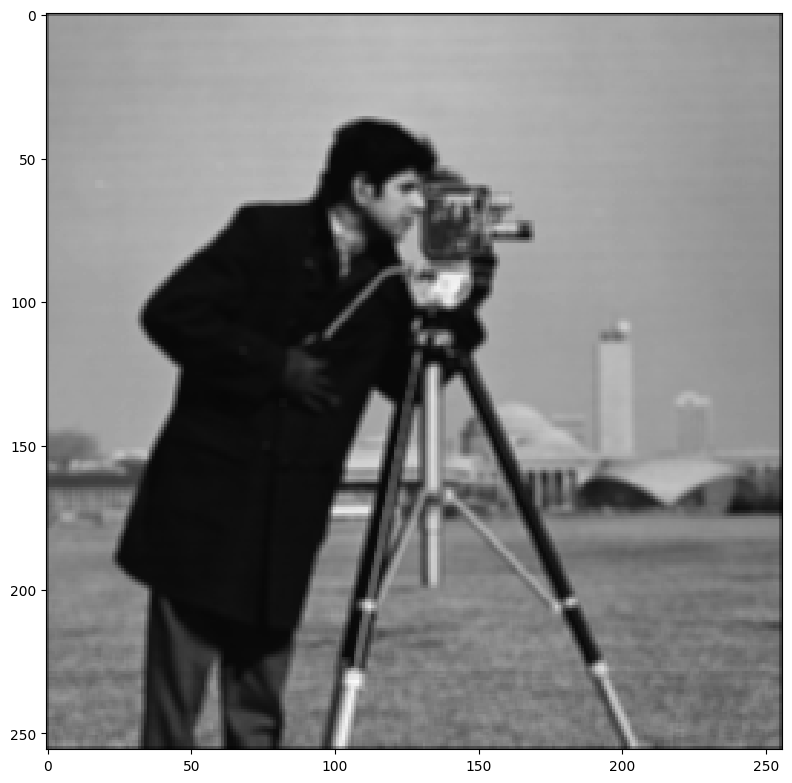

In [2]:
box = np.array([[1., 1., 1],
                [1., 1., 1],
                [1., 1., 1]])/9.

# WRITE YOUR CODE BELOW (DO NOT DELETE THIS LINE)

option1 = scipy.ndimage.correlate(image, box, mode="constant", cval=0.0)
print(f'The image returned is of type: {option1.dtype}')
plt.figure(figsize=(8,8))
imshow(option1);

# WRITE YOUR CODE ABOVE (DO NOT DELETE THIS LINE)

2. Instead of manually defining the kernel and then using `correlate` to apply it, we can do both things at once by using pre-defined functions. Take a moment to check the API to find a suitable function that replaces the code above: https://docs.scipy.org/doc/scipy/reference/ndimage.html<br/>
Once you have identified a suitable function, use it to reproduce the processed output from the previous step.

C:\Users\amjad\AppData\Local\Temp\ipykernel_20776\3896592374.py:3: DeprecationWarning: Please import `uniform_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  option2 = scipy.ndimage.filters.uniform_filter(image, size=3)


The image returned is of type: uint8


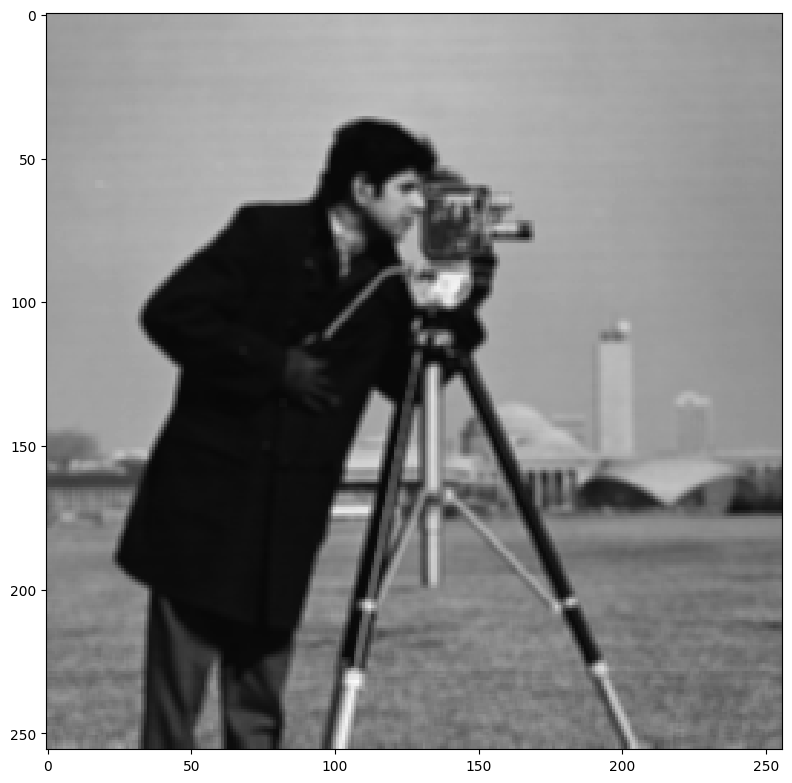

In [ ]:
# WRITE YOUR CODE BELOW (DO NOT DELETE THIS LINE)

option2 = scipy.ndimage.filters.uniform_filter(image, size=3)
print(f'The image returned is of type: {option1.dtype}')
plt.figure(figsize=(8,8))
imshow(option2);

# WRITE YOUR CODE ABOVE (DO NOT DELETE THIS LINE)

Using predefined functions such as `scipy.ndimage.filters.uniform_filter` or `scipy.ndimage.filters.gaussian_filter` is much more convenient, less error-prone, and may be slightly faster. Using them does not require remembering the values of the filters, but you have to remember the names instead. Some of the most relevant linear filtering functions (**I am ommiting filters that we have not yet covered**):
- Gaussian: [`scipy.ndimage.filters.gaussian_filter`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.gaussian_filter.html#scipy.ndimage.gaussian_filter) allows you to specify the filter size and the standard deviation (sigma).
- Box filter (uniform filter): [`scipy.ndimage.filters.uniform_filter`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.uniform_filter.html#scipy.ndimage.uniform_filter) allows you to specify the filter size.

We also find some predefined functions for non-linear filtering. To name a few:
- [Maximum filter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.maximum_filter.html#scipy.ndimage.maximum_filter)
- [Minimum filter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.minimum_filter.html#scipy.ndimage.minimum_filter)
- [Median filter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.median_filter.html#scipy.ndimage.median_filter)
- [Dilation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.grey_dilation.html#scipy.ndimage.grey_dilation)
- [Erosion](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.grey_erosion.html#scipy.ndimage.grey_erosion)

It is worth noting that you won't need to memorise the filtering functions or their API for the exam. For the assessed labs, you will be able to search on the Internet and previous labs. For more details of the types of filter functions and the arguments necessary to create them, check SciPy's documentation here: https://docs.scipy.org/doc/scipy/reference/ndimage.html

## Task 5.1
Use the previously loaded image (`image`) and filter it in the cell below using:
- a Gaussian filter with $\sigma=1$ (sigma),
- a 5 by 5 median filter.
Display the original image and both resulting filtered images.

Discuss the differences that you can see between the original and the filtered images. Take a close look especially at edges in the image.

In [ ]:
# WRITE YOUR CODE BELOW (DO NOT DELETE THIS LINE)



    
# WRITE YOUR CODE ABOVE (DO NOT DELETE THIS LINE)

## Consolidating understanding

You should now know how to apply filters to images in Python using your own correlational filters along with the `correlate` function, or predefined functions. As you have probably noticed, there are many modules that can be of use in Python and you are not expected to remember all the function names nor their parameters. However, you should be able to browse through `SciPy` and `SciKit-image` documentation to find such functions:
- For SciPy: https://docs.scipy.org/doc/scipy/reference/ndimage.html
- For SciKit-image: https://scikit-image.org/docs/stable/api/skimage.filters.html

In this lab, we will try to build our intuition for both **the effects of filtering** and the different **types of noise models** which are used in image processing by performing some experiments.

## Task 5.2
Restoration of images is the process of removing noise (*i.e.*, detail that we don't want) from an image, with the aim that we return to some "uncorrupted" original image. If we want to test an image restoration technique, we need to apply it to a noisy image (or a set of noisy images). To test our methods, we need to generate some noisy images first!

Use the following steps:
<ol>
    <li>Load a greyscale image (you can reuse <em><tt>camera.bmp</tt>).</li>
    <li>Import the function <em><tt>random_noise</tt></em> that comes in the <em><tt>skimage.util</tt></em> module, use it to add different types of noise to your original image. Save the resulting image in a meaningfully named variable and observe the effect by displaying the noisy images.</li>
    <ol>
        <li>Salt and pepper noise (<tt>"s&amp;p"</tt>). What happens when we change the `amount` parameter?</li>
        <li>Gaussian noise (<tt>"gaussian"</tt>). What happens when we change the variance of this noise?</li>
    </ol>
</ol>

**Hint 1**: If you are not sure how to apply the `random_noise` function, look at its documentation: https://scikit-image.org/docs/stable/api/skimage.util.html

**Hint 2** (important): `random_noise` returns a matrix in `float64` format, in the range $[0,1]$. To convert the result to `uint8` in the range $[0,255]$, you can use the `.astype` method: *e.g.*, `(resulting_image*255).astype(np.uint8)`

In [ ]:
# WRITE YOUR CODE BELOW (DO NOT DELETE THIS LINE)



# WRITE YOUR CODE ABOVE (DO NOT DELETE THIS LINE)

## Task 5.3

Now we will experiment with 3 different types of filtering on the noisy images: **box** (or average) filtering, **Gaussian** filtering and **median** filtering. 

Experiment:
- Which filter works best to remove the salt-and-pepper noise?
- Which filter works best for the gaussian noise?
- What effects have the filter sizes?
- Try to increase the amount of noise in the images (Task 5.3) and see if you can still remove it.


Retain your filtered images. You will need them at the end of task 3.

In [ ]:
# WRITE YOUR CODE BELOW (DO NOT DELETE THIS LINE)



# WRITE YOUR CODE ABOVE (DO NOT DELETE THIS LINE)

## Task 5.4
In task 5.3 we **visually** observed the result of using each filter, but this is an opinion and therefore subjective. We would like some *objective* way of measuring the performance of these 3 filters. One such measure is the peak **signal to noise ratio** (PSNR). It compares two images using the following formula:

$\mathit{PSNR} = 10 \cdot \log_{10} \left( \frac{{c_{max}}^2}{\mathit{MSE}} \right)$

Here, MSE is the mean squared error (i.e., the sum of the squared differences of the pixels of the two images).

Write a Python function called `calculatePSNR` that calculates the *peak signal to noise ratio* (PSNR) for two 8 bit grayscale images of the same size. It should:
- Take 2 images as input.
- Calculate the mean squared error (MSE) for the 2 images.
  - The MSE for two images $I$ and $K$ is computed as $\mathit{MSE} = \frac{1}{m\,n}\sum_{i=0}^{m-1}\sum_{j=0}^{n-1} [I(i,j) - K(i,j)]^2$.
  - The formula can be broken down into a few simple steps:
    - Calculate the pixel-wise difference between the images (*i.e.*, subtract the pixel values of one image from the second image). This is a one liner - you just need to subtract one image from another.
    - Square each of these values element-wise. You can use `np.square(x)`, `np.power(x, 2)` or `**` for this (but remember that `^` is not exponentiation in Python!).
    - Add all the squared values together. We can use NumPy to sum all the values in a matrix `M` together using `numpy.sum(I)`.
    - Divide this sum by the number of pixels in the original images (which need to be of the same size). You can use `I.size` to get the number of pixels, or multiply the number of rows by the number of columns - as in the equation.
  - Use the MSE to calculate the PSNR
    - The PSNR formula is: $\mathit{PSNR} = 10 \cdot \log_{10} \left( \frac{{c_{max}}^2}{\mathit{MSE}} \right)$
    - Note that:
      - $c_{max}$ is the maximum value that a pixel can take. What is the maximum value that a pixel in an 8 bit greyscale image can take?
      - $\log_{10}$ is a logarithm with base 10. To calculate it you can use NumPy's `numpy.log10`.

Hints:
- Hint 1: Greyscale images are often represented as 8-bit integers. What is the 8 bit integer result of "4-5"? We can find this using `numpy.uint8(4-5)`.
- Hint 2: To convert a matrix M to a matrix of double values, we can use `M.astype(float)`.

Once the PSNR function is implemented, we can run some simple tests to ensure it works as expected:
- If we pass the same image to the function in both its inputs (*e.g.*, `calculatePSNR(f,f)`), the PSNR should be infinite (`inf` in Python).
- If we pass two different images to the function, the resulting PSNR should be independent of the order in which we passed them (*e.g.*, `calculatePSNR(f,g)` should give us the same result as `calculatePSNR(g,f)`).

Now that our PSNR function works, we can use it to examine our noisy and filtered images from earlier: 
- Compute the PSNR between the original image and your various filtered images from task 5.3.
- Does the empirical result match your (subjective) observed result of which filter works best?

In [ ]:
# WRITE YOUR CODE BELOW (DO NOT DELETE THIS LINE)



# WRITE YOUR CODE ABOVE (DO NOT DELETE THIS LINE)

## Task 5.5 (if you're curious)
Changing the filter size has an effect on filtering performance. We can use the techniques discussed above to find the ideal filter type (*e.g.*, box, Gaussian or median) and filter size (from the options 3 by 3, to 11 by 11) for a given greyscale image.

You could take the following steps:
- Create a corrupted image by adding salt and pepper noise with noise `amount` 0.03.
- Loop through all filter configurations and filter sizes and compute the PSNR of the filtered image compared to the original.
- Create plots to visualize your results.

What filters and filter sizes work best?

## End of lab 05

### Basic Python implementation of a correlational filter
This implementation is not efficient at all and assumes that you use odd-shaped filters. It is only provided to show you how it would be done. If you are curious, you can try measuring the time it takes to process images.

In [ ]:
def my_correlation(image, c_filter):
    """
    Returns the response of a given correlational filter `c_filter` for a given image
    `image`.
    """
    # Create the returned array without initialising its values 
    result = np.empty(image.shape)

    # This adds vertical zero-padding to `temp`
    v_radius = int(math.floor(c_filter.shape[0]/2))
    v_padding = np.zeros( (v_radius, image.shape[1]) )
    temp = np.vstack( (v_padding, image, v_padding) )

    # This adds horizontal zero-padding `temp`
    h_radius = int(math.floor(c_filter.shape[1]/2))
    h_padding = np.zeros( (temp.shape[0], h_radius) )
    temp = np.hstack( (h_padding, temp, h_padding) )

    # For each possible MxN neighbourhood in the image...
    for row in range(v_radius, temp.shape[0]-v_radius):
        for col in range(h_radius, temp.shape[1]-h_radius):
            # Extract the neighbourhood
            neighbour = temp[row-v_radius:row+v_radius+1, col-h_radius:col+h_radius+1]
            # Compute the response multiplying element-wise and adding the result
            response = np.sum(neighbour*c_filter) # Bear in mind that * is not @!!
            # Write the response in the image
            result[row-v_radius, col-h_radius] = response

    # We might have made multiplications using floating point number (if the filter
    # mask contains float values). We convert to uint8 (unsigned 8 bits), before
    # returning the result.
    return result.astype(np.uint8)

box = np.array([[1., 1., 1.],
                [1., 1., 1.],
                [1., 1., 1.]])/9.

option_inefficient = my_correlation(image, box)
plt.figure(figsize=(8,8))
imshow(option_inefficient);